In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
data2017_east1a_x_path = '/content/drive/MyDrive/Colab Notebooks/Cloud/data_x2017.csv'
data2017_east1a_y_path = '/content/drive/MyDrive/Colab Notebooks/Cloud/data_y_2017.csv'

In [30]:
data_x = pd.read_csv(data2017_east1a_x_path, delimiter=',', header=None, low_memory=False)

In [31]:
data_y = pd.read_csv(data2017_east1a_y_path, delimiter=',', header=None, low_memory=False)

In [32]:
data_x

,0,1,2,3,4,5
0,year,month,day,hour,minute,second
1,2017.0,3.0,29.0,21.0,54.0,1.0
2,2017.0,4.0,6.0,12.0,6.0,42.0
3,2017.0,5.0,16.0,22.0,6.0,40.0
4,2017.0,6.0,2.0,11.0,1.0,4.0
...,...,...,...,...,...,...
207468,2017.0,8.0,7.0,7.0,44.0,1.0
207469,2017.0,7.0,9.0,9.0,39.0,1.0
207470,2017.0,8.0,28.0,2.0,42.0,26.0
207471,2017.0,9.0,15.0,19.0,8.0,5.0


In [3]:
# Importing the libraries
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

from sqlalchemy.sql.operators import not_endswith_op
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline
trainAcc = []
testAcc = []

Epoch 1/5
4714/4714 [==============================] - 108s 21ms/step - loss: 0.0068
Epoch 2/5
4714/4714 [==============================] - 101s 21ms/step - loss: 0.0066
Epoch 3/5
4714/4714 [==============================] - 101s 21ms/step - loss: 0.0064
Epoch 4/5
4714/4714 [==============================] - 101s 22ms/step - loss: 0.0064
Epoch 5/5
4714/4714 [==============================] - 29s 6ms/step
r2 Test: 0.08097970927016629
mse Test: 0.005442037010735058
rmse Test: 0.07377016341811274
MAPE Test: 0.2617498296808445
MAE Test: 0.03089477934148717


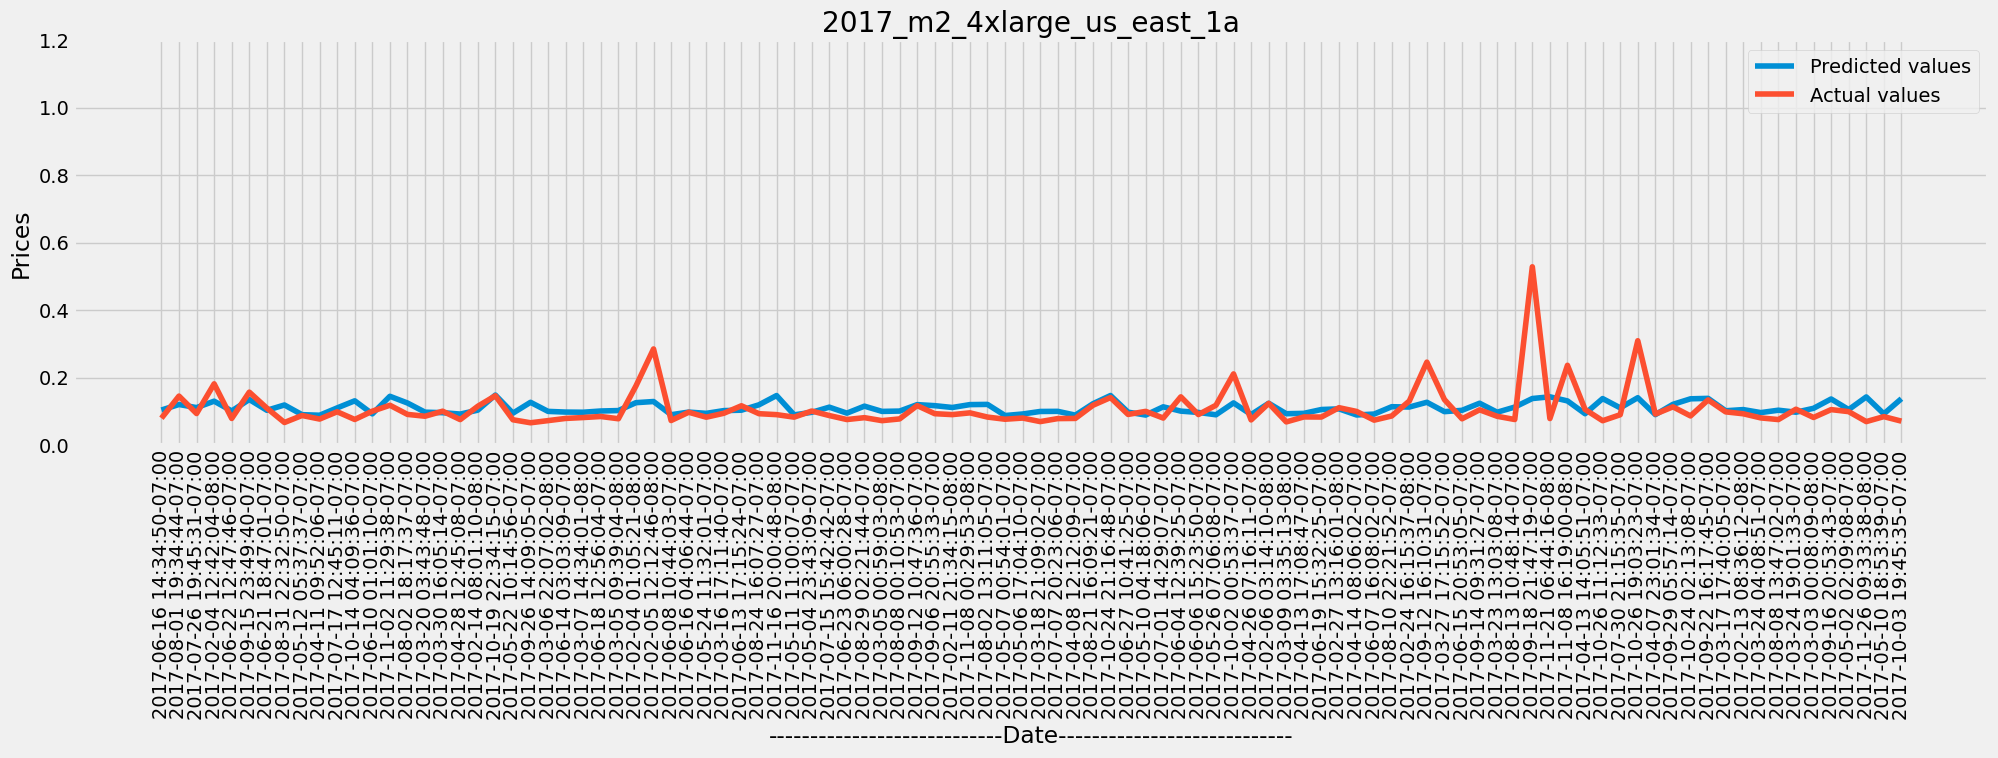

Epoch 1/5
3786/3786 [==============================] - 92s 22ms/step - loss: 0.0073
Epoch 2/5
3786/3786 [==============================] - 87s 23ms/step - loss: 0.0069
Epoch 3/5
3786/3786 [==============================] - 89s 24ms/step - loss: 0.0069
Epoch 4/5
3786/3786 [==============================] - 90s 24ms/step - loss: 0.0068
Epoch 5/5
3786/3786 [==============================] - 25s 6ms/step
r2 Test: 0.07526778293281167
mse Test: 0.007847204764337277
rmse Test: 0.08858444990142049
MAPE Test: 0.2148310269813568
MAE Test: 0.029944262956762547


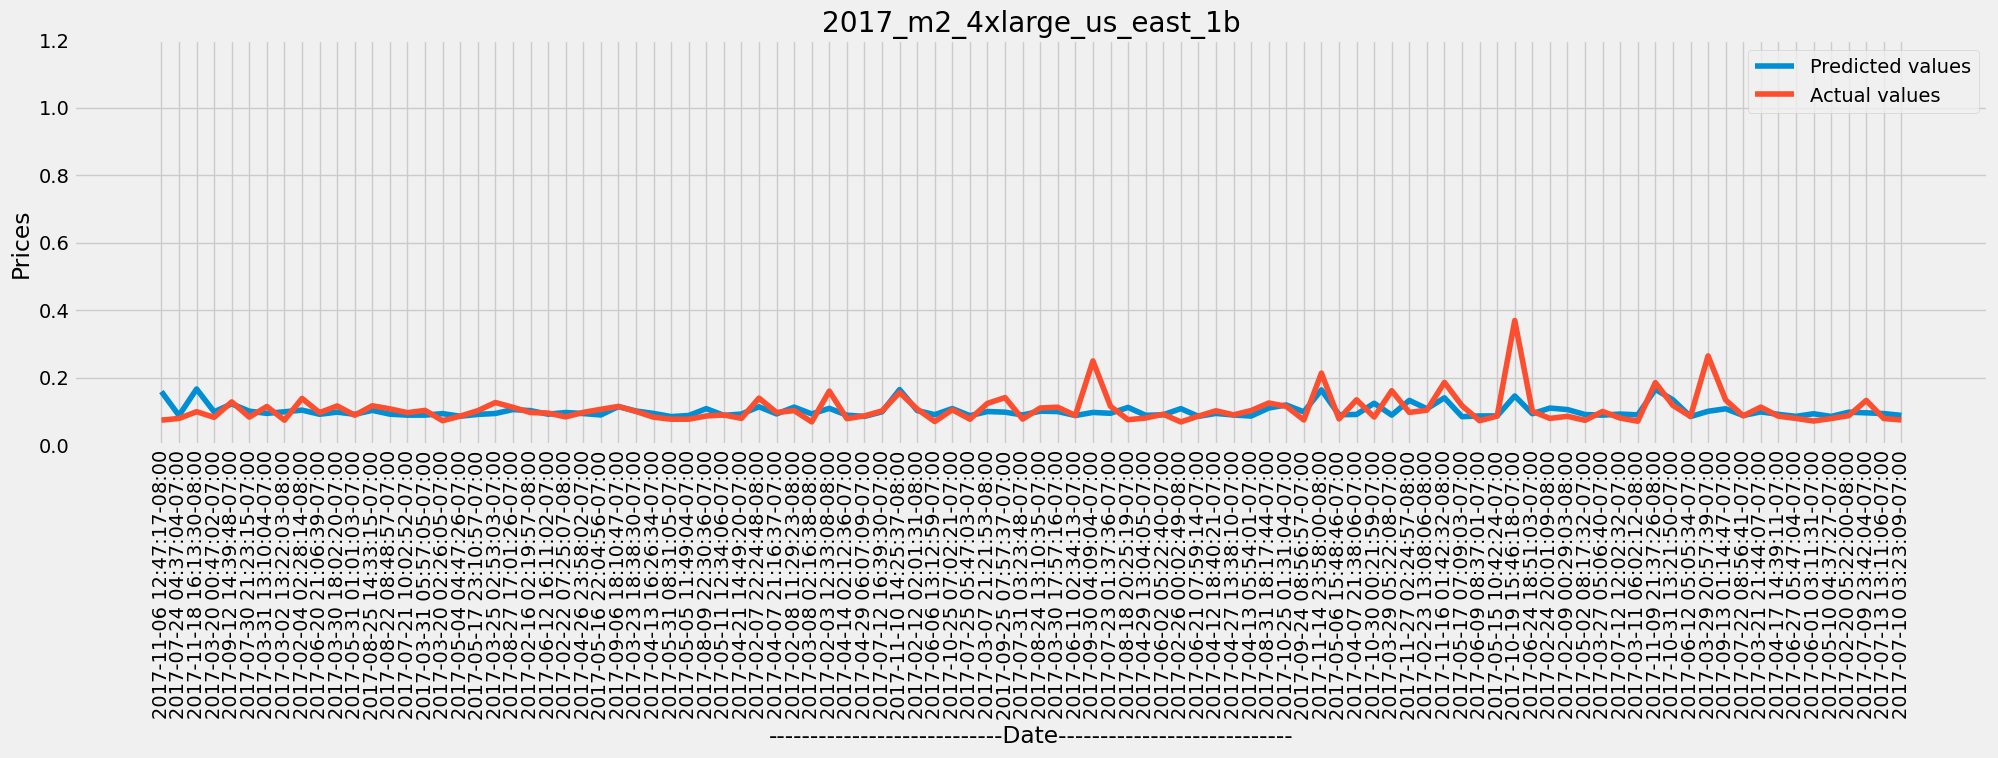

Epoch 1/5
1131/1131 [==============================] - 38s 25ms/step - loss: 0.0103
Epoch 2/5
1131/1131 [==============================] - 27s 24ms/step - loss: 0.0098
Epoch 3/5
1131/1131 [==============================] - 29s 25ms/step - loss: 0.0096
Epoch 4/5
1131/1131 [==============================] - 27s 24ms/step - loss: 0.0095
Epoch 5/5
1131/1131 [==============================] - 7s 7ms/step
r2 Test: 0.1251967745796323
mse Test: 0.006819395717261453
rmse Test: 0.08257963258129364
MAPE Test: 0.21752411831267995
MAE Test: 0.025474717755319537


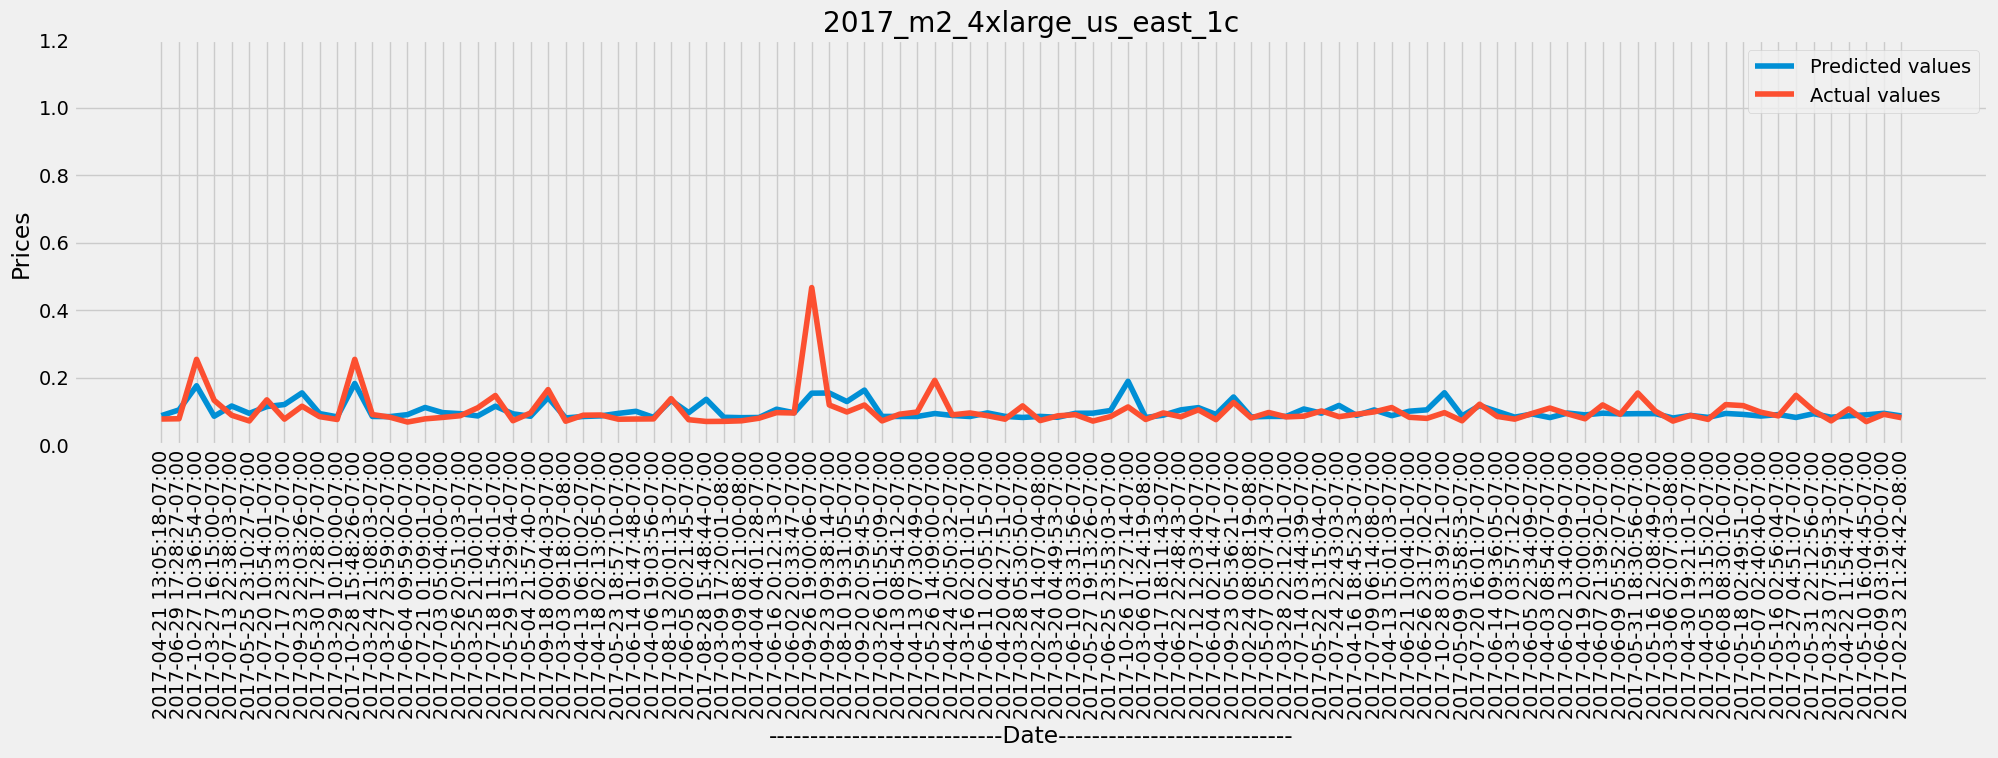

Epoch 1/5
4539/4539 [==============================] - 123s 25ms/step - loss: 0.0169
Epoch 2/5
4539/4539 [==============================] - 109s 24ms/step - loss: 0.0164
Epoch 3/5
4539/4539 [==============================] - 111s 25ms/step - loss: 0.0162
Epoch 4/5
4539/4539 [==============================] - 108s 24ms/step - loss: 0.0162
Epoch 5/5
4539/4539 [==============================] - 30s 7ms/step
r2 Test: 0.10991306821507418
mse Test: 0.01383612670831564
rmse Test: 0.11762706622336391
MAPE Test: 0.24332203783910863
MAE Test: 0.036139960225407726


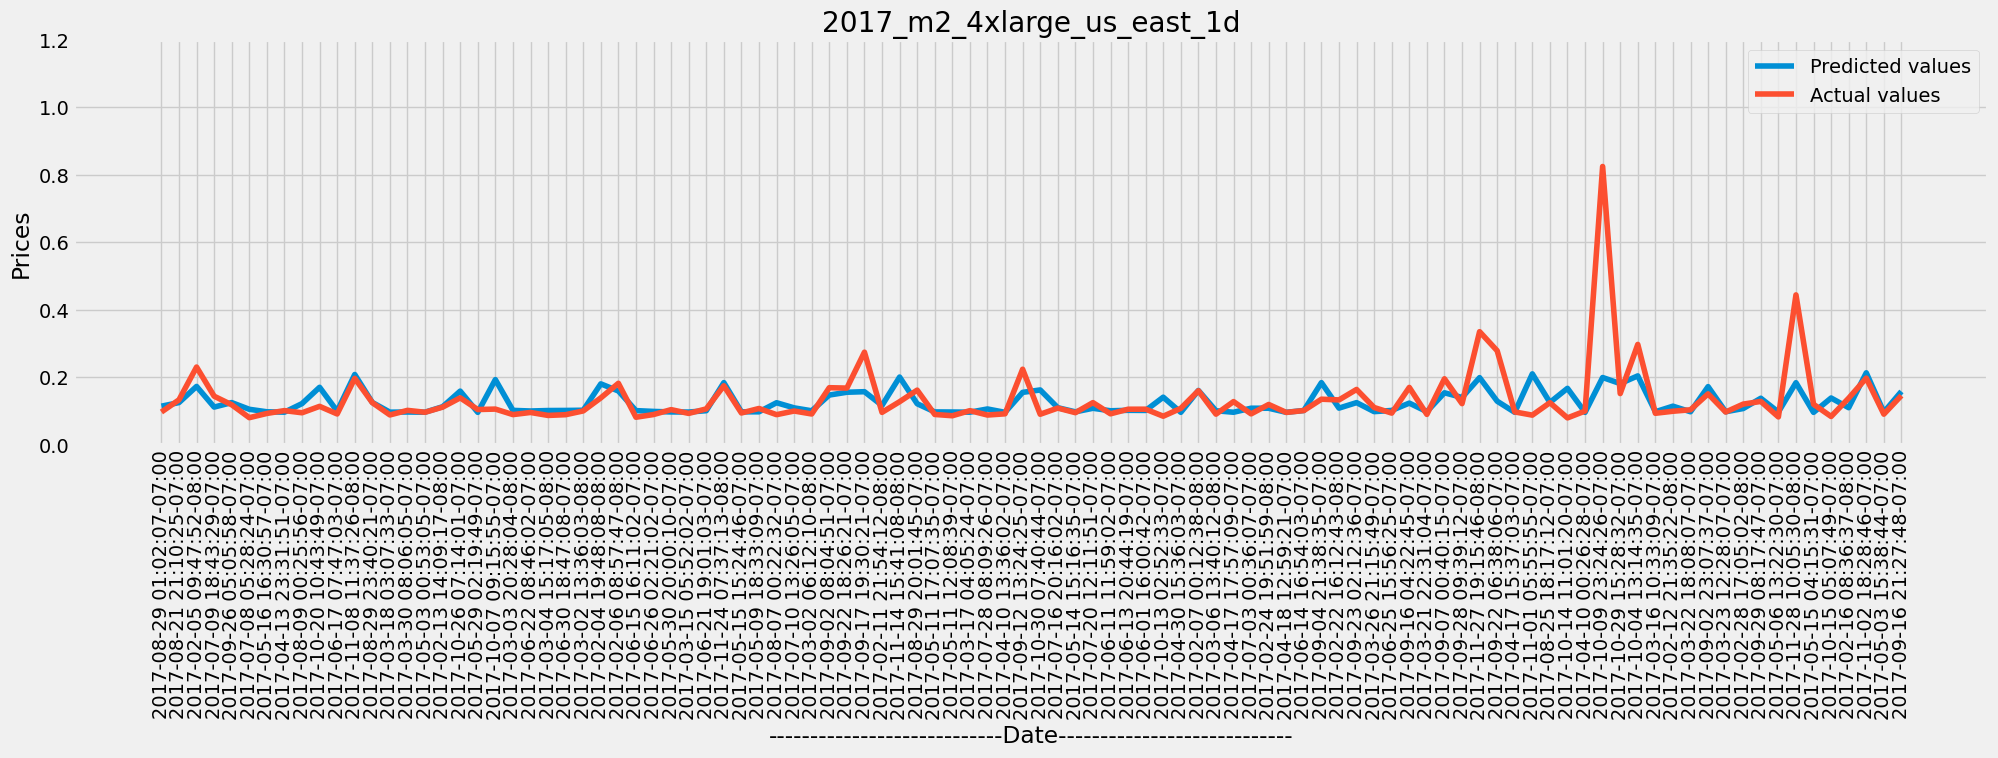

In [37]:
files=['/content/drive/MyDrive/Colab Notebooks/Cloud/2017_m2_4xlarge_us_east_1a','/content/drive/MyDrive/Colab Notebooks/Cloud/2017_m2_4xlarge_us_east_1b',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2017_m2_4xlarge_us_east_1c',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2017_m2_4xlarge_us_east_1d']
for fileName in files:
  data_path = fileName
  data = pd.read_csv(data_path, delimiter=',', header=None, low_memory=False)
  data.columns = ['Price', 'Date','OS','Region','year', 'month','day', 'hour', 'minute', 'second']
  data = data.drop(0)
  data.isna().any(axis=1).sum()
  data_temp = data
  data.dropna(axis=1)
  data_y = data['Price']
  data_x = data.drop(['Price'], axis=1)
  data_y = data_y.reset_index()
  data_x = data_x.reset_index()
  data_y = data_y.drop(['index'], axis=1)
  data_y['Price'] = data_y['Price'].astype(float)
  data_x = data_x.drop(['Date','OS','index', 'Region'], axis=1)
  data_x = data_x.astype(float)
  X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state=42, shuffle = False)
  trainAcc = []
  testAcc = []
  # The LSTM architecture
  regressor = Sequential()
  # First LSTM layer with Dropout regularisation
  regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
  regressor.add(Dropout(0.2))
  # Second LSTM layer
  regressor.add(LSTM(units=50, return_sequences=True))
  regressor.add(Dropout(0.2))
  # Third LSTM layer
  regressor.add(LSTM(units=50, return_sequences=True))
  regressor.add(Dropout(0.2))
  # Fourth LSTM layer
  regressor.add(LSTM(units=50))
  regressor.add(Dropout(0.2))
  # The output layer
  regressor.add(Dense(units=1))

  # Compiling the RNN
  regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
  # Fitting to the training set
  regressor.fit(X_train,Y_train,epochs=5,batch_size=32)

  y_pred_test = regressor.predict(X_test)
  y_pred_train = regressor.predict(X_train)
  testAcc.append(mean_absolute_percentage_error(Y_test, y_pred_test))
  MAE_test = mean_absolute_error(Y_test, y_pred_test)
  MAPE_test = mean_absolute_percentage_error(Y_test, y_pred_test)
  mse_test = mean_squared_error(Y_test, y_pred_test)
  rmse_test = np.sqrt(mse_test)
  r2_test = r2_score(Y_test, y_pred_test)
  print(f"r2 Test: {r2_test}")
  print(f"mse Test: {mse_test}")
  print(f"rmse Test: {rmse_test}")
  print(f"MAPE Test: {MAPE_test}")
  print(f"MAE Test: {MAE_test}")
  Y_test_array = Y_test['Price'].values
  Y_test_array = np.array(Y_test_array)
  test_range = Y_test['Price'].values
  x_values = np.arange(len(Y_test_array))
  test_array = [float(value) for value in test_range.tolist()]
  Y_test_array = Y_test['Price'].values

  tested_data_index = Y_test.iloc[:, :0]
  Y_test_data = pd.DataFrame(Y_test, index=tested_data_index.index)
  dfilter = pd.DataFrame(index=tested_data_index.index)
  filteredList = dfilter.index.tolist();
  i = 0
  j = 0
  dictionary_Predict_value = {}
  dictionary_Test_value = {}

  for val in y_pred_test:
    dictionary_Predict_value[filteredList[i]]=val
    i=i+1
  for val in Y_test['Price'].values:
    dictionary_Test_value[filteredList[j]]=float(val)
    j=j+1

  Y_test_data = pd.DataFrame(Y_test, index=Y_test.index)
  Y_test_index = Y_test_data[Y_test_data['Price'].notna()]
  linux_values = pd.DataFrame(index=Y_test_index.index).index.tolist()
  test_array_ = []
  pred_array_ = []
  x_values = []
  for key in linux_values:
    test_array_.append(dictionary_Test_value[key])
    pred_array_.append(dictionary_Predict_value[key])
    x_values.append(data_temp.iloc[key]['Date'])

  x_lables = np.arange(len(x_values))
  test_array_values = [float(value) for value in test_array_]
  pred_array_values = [float(value) for value in pred_array_]
  rcParams['figure.figsize'] = 22, 5
    # Plot the data
  plt.plot(pred_array_values[0:100])

  plt.plot(test_array_values[0:100])

  plt.ylim(0, 1.2)
  # plt.yticks([0,0.05,0.10,0.15,0.20,.25,.30,.35,.40,.45,.50,.55,.60])
  # plt.yticks([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,.08,.09,.10])

    #plt.xlim(0, 150)
  plt.xticks(x_lables[0:100], x_values[0:100], rotation=90)
  plt.legend(['Predicted values','Actual values'])
    # Add labels and legend
  plt.ylabel('Prices')
  plt.xlabel("----------------------------Date----------------------------")
  plt.title(fileName.split('/')[-1])
    # Show the plot
  plt.show();

Epoch 1/5
35/35 [==============================] - 8s 16ms/step - loss: 0.1030
Epoch 2/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0931
Epoch 3/5
35/35 [==============================] - 1s 16ms/step - loss: 0.0864
Epoch 4/5
35/35 [==============================] - 1s 23ms/step - loss: 0.0827
Epoch 5/5
35/35 [==============================] - 0s 8ms/step
r2 Test: 0.22179373845530514
mse Test: 0.08071777023518135
rmse Test: 0.2841087296004495
MAPE Test: 0.9189949182785765
MAE Test: 0.21231506024659183


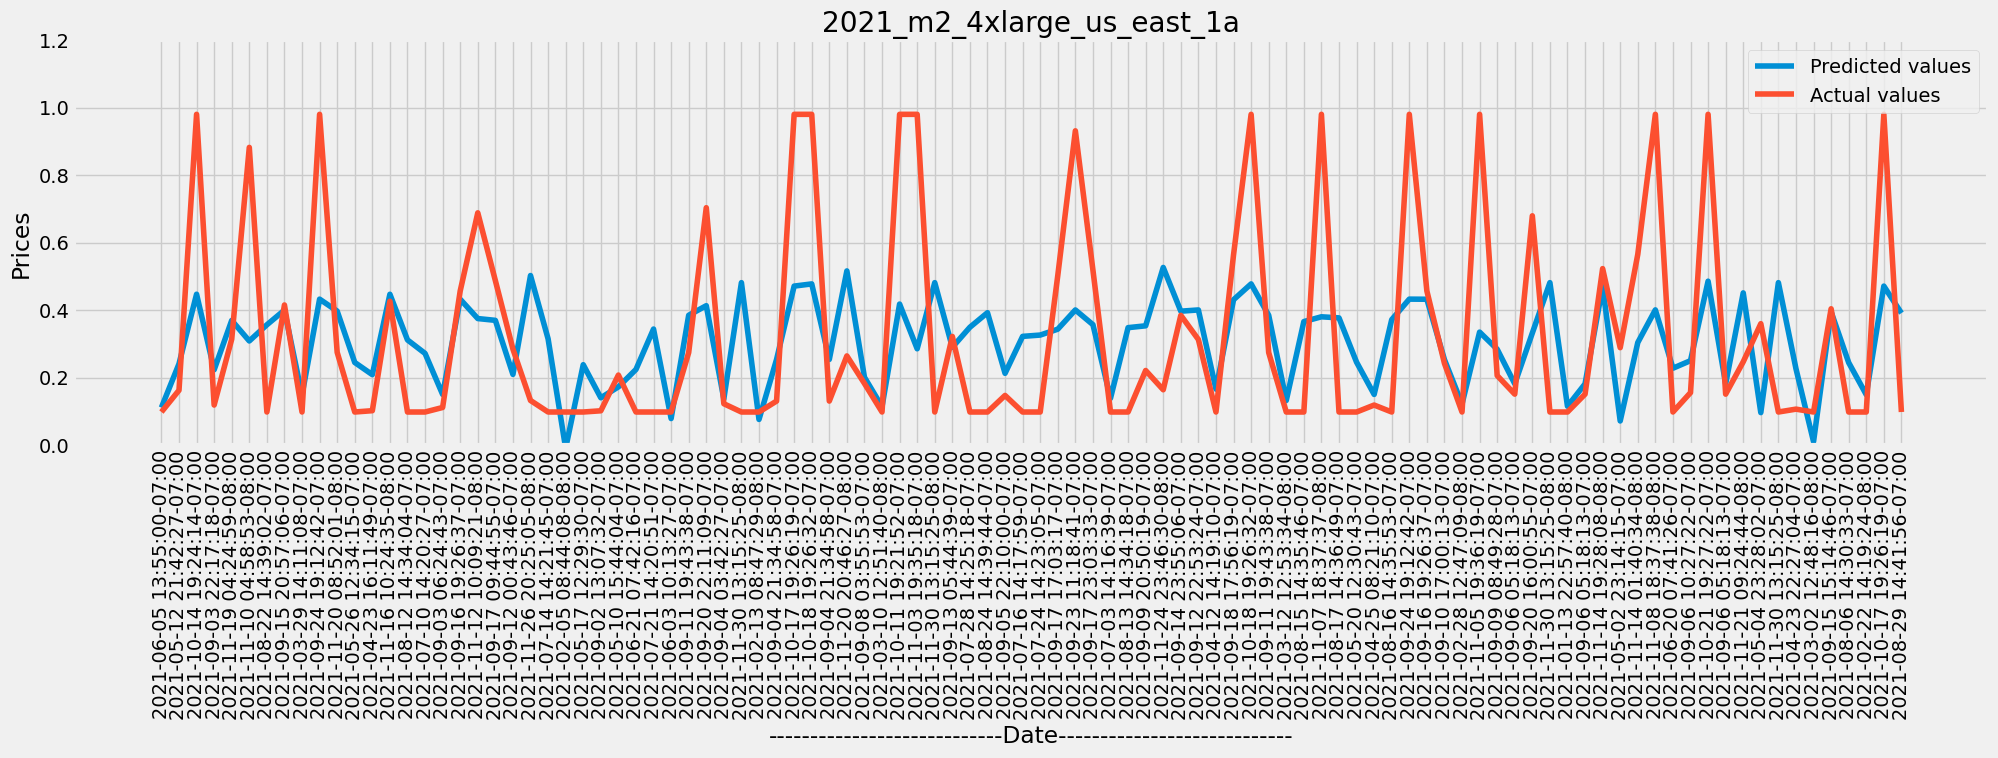

Epoch 1/5
34/34 [==============================] - 8s 17ms/step - loss: 0.0074
Epoch 2/5
34/34 [==============================] - 1s 18ms/step - loss: 0.0066
Epoch 3/5
34/34 [==============================] - 1s 26ms/step - loss: 0.0063
Epoch 4/5
34/34 [==============================] - 1s 24ms/step - loss: 0.0064
Epoch 5/5
34/34 [==============================] - 0s 7ms/step
r2 Test: -0.11256150822911692
mse Test: 0.0070749349268815044
rmse Test: 0.08411263238587594
MAPE Test: 0.25926458648681927
MAE Test: 0.050684886731565265


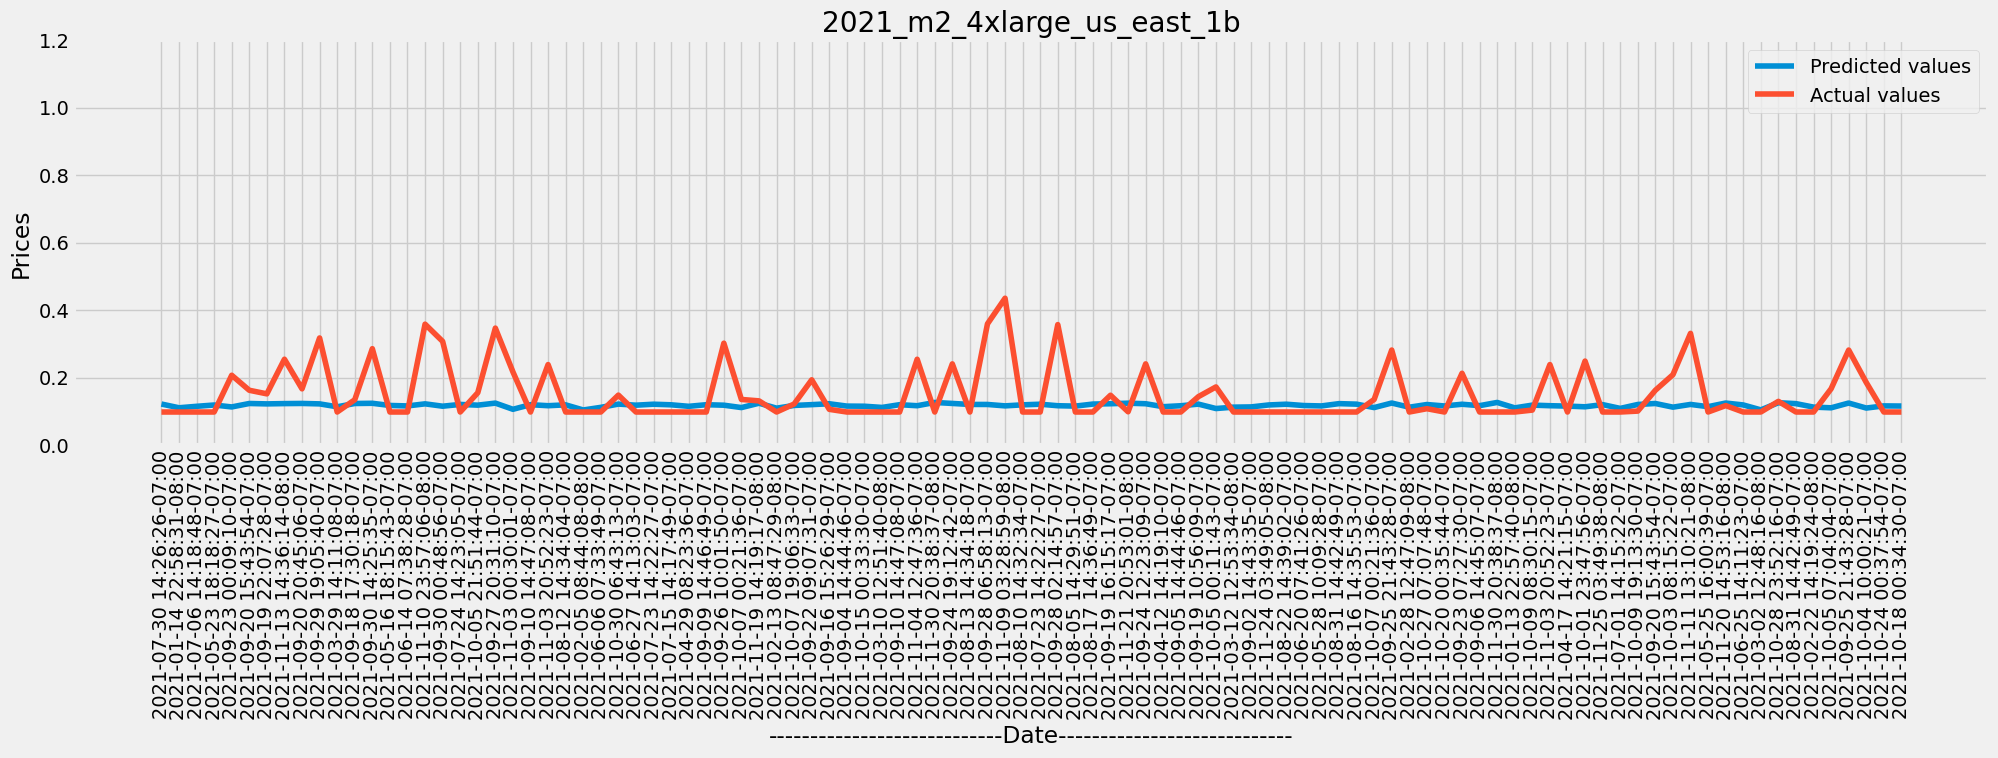

Epoch 1/5
31/31 [==============================] - 8s 19ms/step - loss: 0.0028
Epoch 2/5
31/31 [==============================] - 1s 20ms/step - loss: 0.0024
Epoch 3/5
31/31 [==============================] - 1s 24ms/step - loss: 0.0023
Epoch 4/5
31/31 [==============================] - 1s 27ms/step - loss: 0.0022
Epoch 5/5
31/31 [==============================] - 0s 8ms/step
r2 Test: 0.11276629021555484
mse Test: 0.0016669295996925015
rmse Test: 0.04082804917813857
MAPE Test: 0.19368125030366748
MAE Test: 0.026890564132815317


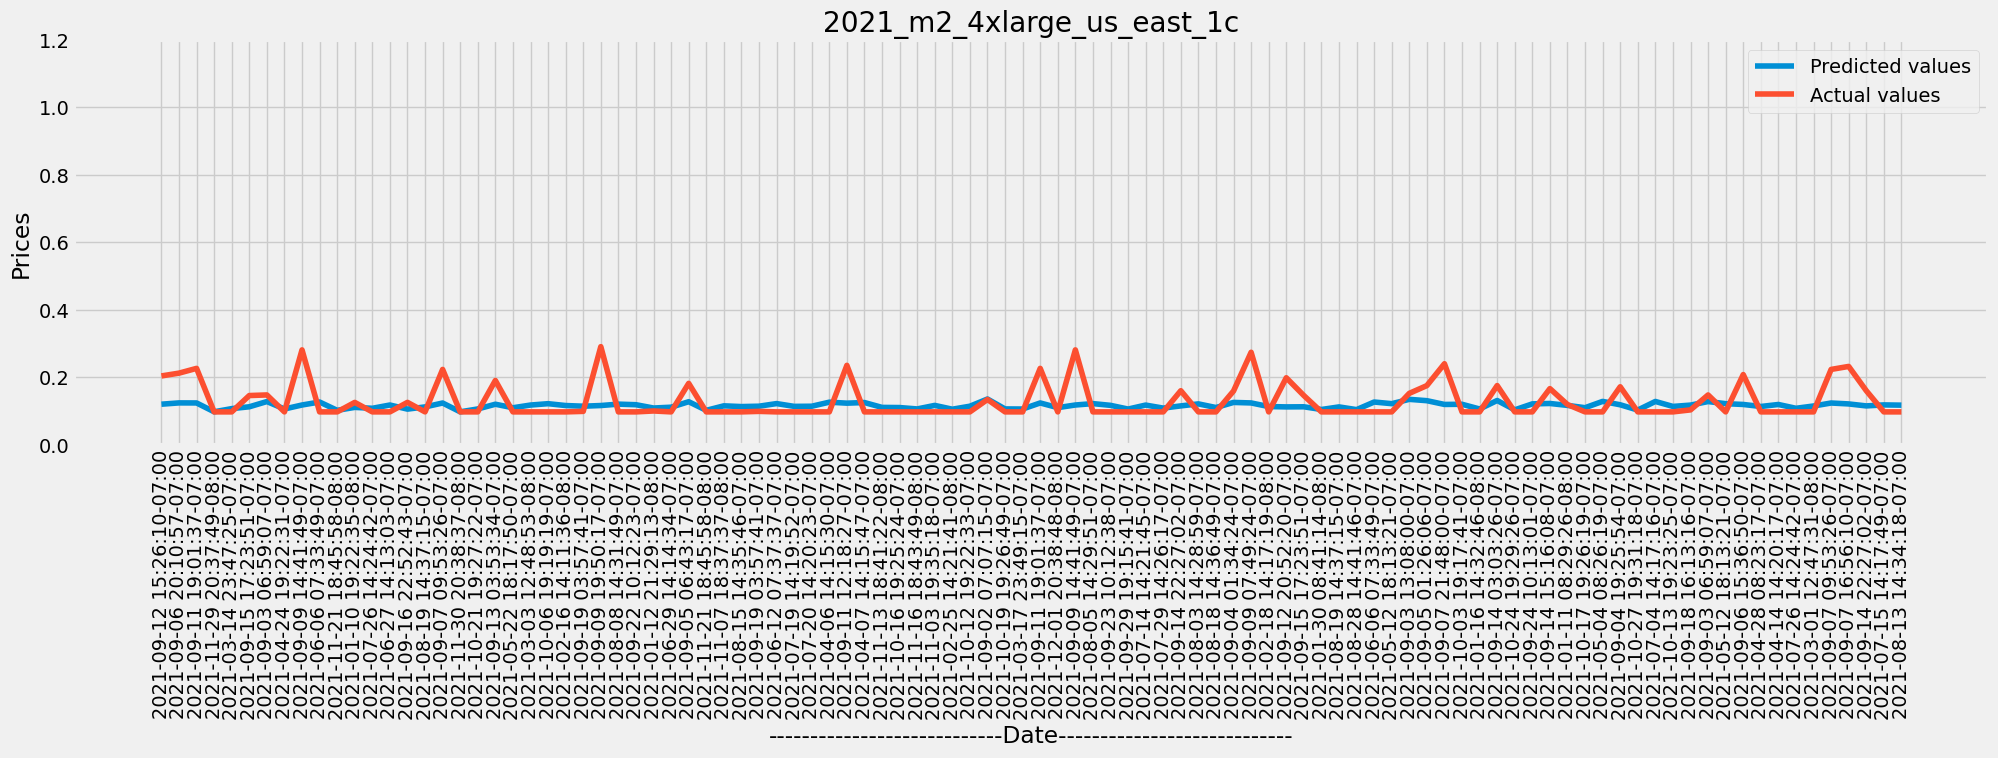

Epoch 1/5
25/25 [==============================] - 8s 19ms/step - loss: 0.0011
Epoch 2/5
25/25 [==============================] - 0s 19ms/step - loss: 4.1206e-04
Epoch 3/5
25/25 [==============================] - 1s 29ms/step - loss: 3.2995e-04
Epoch 4/5
25/25 [==============================] - 1s 29ms/step - loss: 2.3763e-04
Epoch 5/5
25/25 [==============================] - 0s 8ms/step
r2 Test: -3.218480417413913e+29
mse Test: 0.0002479427124528554
rmse Test: 0.015746196761531193
MAPE Test: 0.16056702772977233
MAE Test: 0.01573556871751769


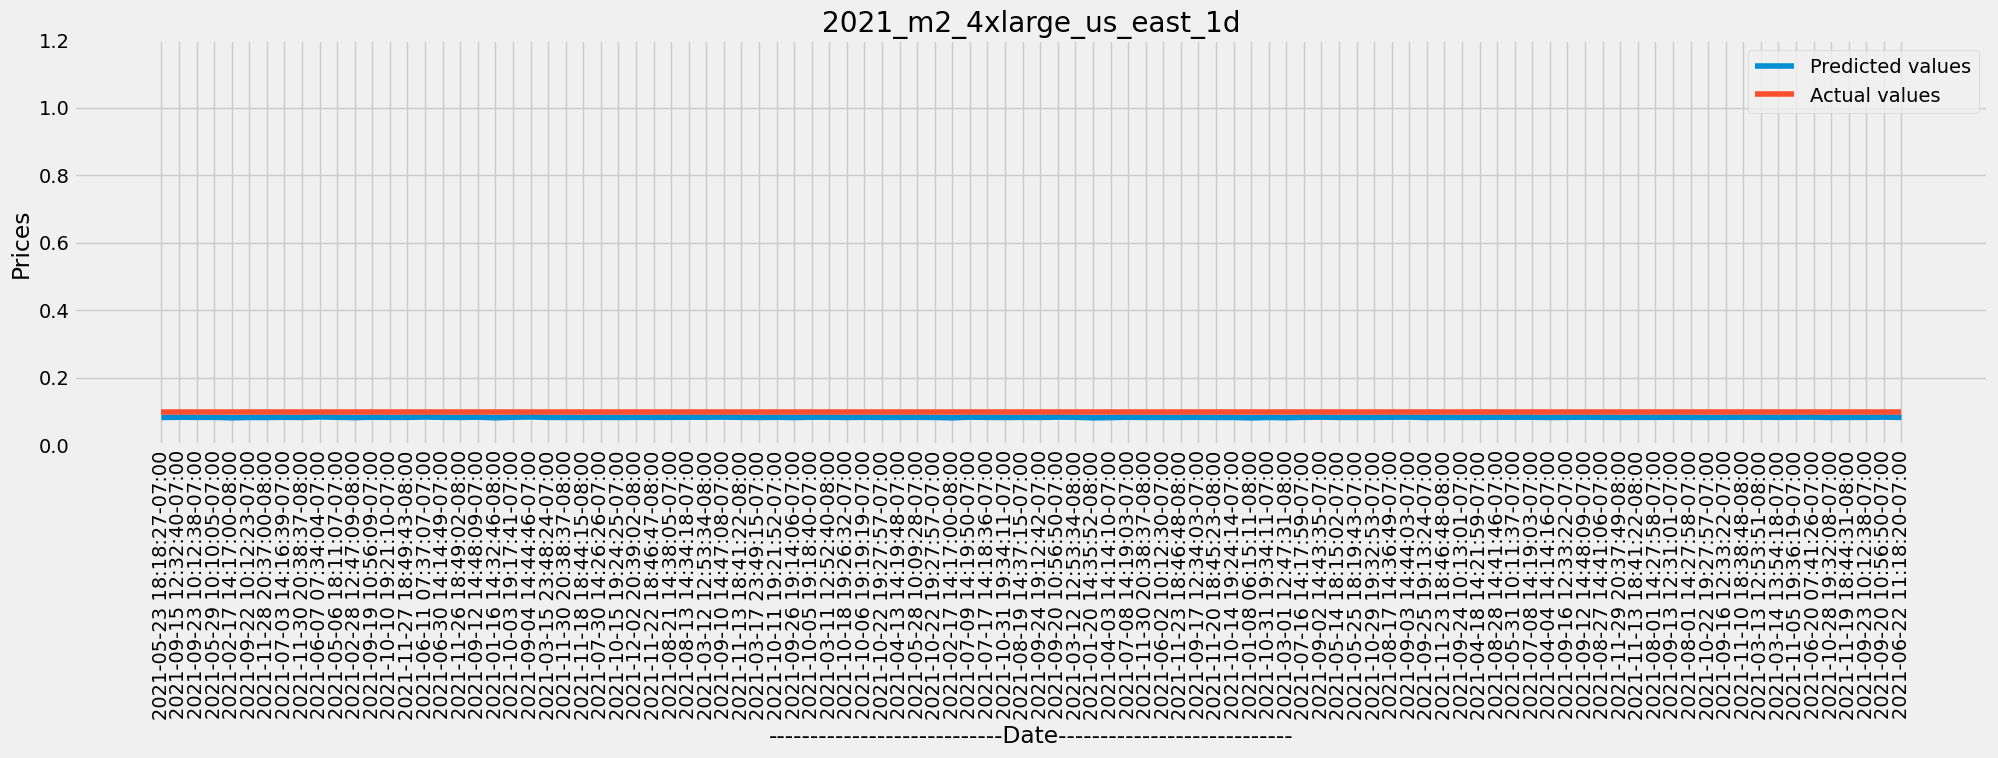

In [6]:
files=['/content/drive/MyDrive/Colab Notebooks/Cloud/2021_m2_4xlarge_us_east_1a',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2021_m2_4xlarge_us_east_1b',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2021_m2_4xlarge_us_east_1c',
       '/content/drive/MyDrive/Colab Notebooks/Cloud/2021_m2_4xlarge_us_east_1d']
for fileName in files:
  data_path = fileName
  data = pd.read_csv(data_path, delimiter=',', header=None, low_memory=False)
  data.columns = ['Price', 'Date','OS','year', 'month','day', 'hour', 'minute', 'second']
  data = data.drop(0)
  data.isna().any(axis=1).sum()
  data_temp = data
  data.dropna(axis=1)
  data_y = data['Price']
  data_x = data.drop(['Price'], axis=1)
  data_y = data_y.reset_index()
  data_x = data_x.reset_index()
  data_y = data_y.drop(['index'], axis=1)
  data_y['Price'] = data_y['Price'].astype(float)
  data_x = data_x.drop(['Date','OS','index'], axis=1)
  data_x = data_x.astype(float)
  X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state=42, shuffle = False)
  trainAcc = []
  testAcc = []

  # The LSTM architecture
  regressor = Sequential()
  # First LSTM layer with Dropout regularisation
  regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
  regressor.add(Dropout(0.2))
  # Second LSTM layer
  regressor.add(LSTM(units=50, return_sequences=True))
  regressor.add(Dropout(0.2))
  # Third LSTM layer
  regressor.add(LSTM(units=50, return_sequences=True))
  regressor.add(Dropout(0.2))
  # Fourth LSTM layer
  regressor.add(LSTM(units=50))
  regressor.add(Dropout(0.2))
  # The output layer
  regressor.add(Dense(units=1))

  # Compiling the RNN
  regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
  # Fitting to the training set
  regressor.fit(X_train,Y_train,epochs=5,batch_size=32)

  y_pred_test = regressor.predict(X_test)
  y_pred_train = regressor.predict(X_train)
  testAcc.append(mean_absolute_percentage_error(Y_test, y_pred_test))
  MAE_test = mean_absolute_error(Y_test, y_pred_test)
  MAPE_test = mean_absolute_percentage_error(Y_test, y_pred_test)
  mse_test = mean_squared_error(Y_test, y_pred_test)
  rmse_test = np.sqrt(mse_test)
  r2_test = r2_score(Y_test, y_pred_test)
  print(f"r2 Test: {r2_test}")
  print(f"mse Test: {mse_test}")
  print(f"rmse Test: {rmse_test}")
  print(f"MAPE Test: {MAPE_test}")
  print(f"MAE Test: {MAE_test}")
  Y_test_array = Y_test['Price'].values
  Y_test_array = np.array(Y_test_array)
  test_range = Y_test['Price'].values
  x_values = np.arange(len(Y_test_array))
  test_array = [float(value) for value in test_range.tolist()]
  Y_test_array = Y_test['Price'].values

  tested_data_index = Y_test.iloc[:, :0]
  Y_test_data = pd.DataFrame(Y_test, index=tested_data_index.index)
  dfilter = pd.DataFrame(index=tested_data_index.index)
  filteredList = dfilter.index.tolist();
  i = 0
  j = 0
  dictionary_Predict_value = {}
  dictionary_Test_value = {}

  for val in y_pred_test:
    dictionary_Predict_value[filteredList[i]]=val
    i=i+1
  for val in Y_test['Price'].values:
    dictionary_Test_value[filteredList[j]]=float(val)
    j=j+1

  Y_test_data = pd.DataFrame(Y_test, index=Y_test.index)
  Y_test_index = Y_test_data[Y_test_data['Price'].notna()]
  linux_values = pd.DataFrame(index=Y_test_index.index).index.tolist()
  test_array_ = []
  pred_array_ = []
  x_values = []
  for key in linux_values:
    test_array_.append(dictionary_Test_value[key])
    pred_array_.append(dictionary_Predict_value[key])
    x_values.append(data_temp.iloc[key]['Date'])

  x_lables = np.arange(len(x_values))
  test_array_values = [float(value) for value in test_array_]
  pred_array_values = [float(value) for value in pred_array_]
  rcParams['figure.figsize'] = 22, 5
    # Plot the data
  plt.plot(pred_array_values[0:100])

  plt.plot(test_array_values[0:100])

  plt.ylim(0, 1.2)
  # plt.yticks([0,0.05,0.10,0.15,0.20,.25,.30,.35,.40,.45,.50,.55,.60])
  # plt.yticks([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,.08,.09,.10])

    #plt.xlim(0, 150)
  plt.xticks(x_lables[0:100], x_values[0:100], rotation=90)
  plt.legend(['Predicted values','Actual values'])
    # Add labels and legend
  plt.ylabel('Prices')
  plt.xlabel("----------------------------Date----------------------------")
  plt.title(fileName.split('/')[-1])
    # Show the plot
  plt.show();